- Read in sheets from the excel

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_english = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Engelska", skiprows=8)
df_mathematics = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Matematik", skiprows=8)
df_swedish = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Svenska", skiprows=8)
df_swedish_2 = pd.read_excel("../data/riket2023_åk9_np (1).xlsx", sheet_name="Svenska som andraspråk", skiprows=8)
df_english

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


- Method for changing columns for all dataframes

In [328]:
def change_columns(dataframes, rename_list):
    for dataframe in dataframes:
        for i, col_name in enumerate(rename_list):
                dataframe.rename(columns={dataframe.columns[i]: col_name}, inplace=True) 

rename_list = [
        "Riket",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (Poäng)",
        "Flickor (Poäng)",
        "Pojkar (Poäng)"
]

dfs = [df_mathematics, df_english, df_swedish, df_swedish_2]
change_columns(dfs, rename_list)
df_mathematics

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


- B)

In [329]:

boys_passed = round(df_mathematics.loc[0, "Pojkar (A-F)"] * df_mathematics.loc[0, "Pojkar (A-E)"] / 100)
girls_passed = round(df_mathematics.loc[0, "Flickor (A-F)"] * df_mathematics.loc[0, "Flickor (A-E)"] / 100)

print(boys_passed)
print(girls_passed)

49420
45723


- C)

In [330]:
# create a method for this that takes a dataframe as arugment and the index vales 1, 8
total_points_english = df_english.iloc[0, 8]
print(total_points_english)

total_points_mathematics = df_mathematics.iloc[1´0, 8]
print(total_points_mathematics)

total_points_swedish = df_swedish.iloc[0, 8]
print(total_points_swedish)

total_points_swedish_2 = df_swedish_2.iloc[0, 8]
print(total_points_swedish_2)





15.7
11.6
13.3


Text(0.5, 1.0, 'The avarage total scores of students in grade 9\n on the national tests in respective subjects')

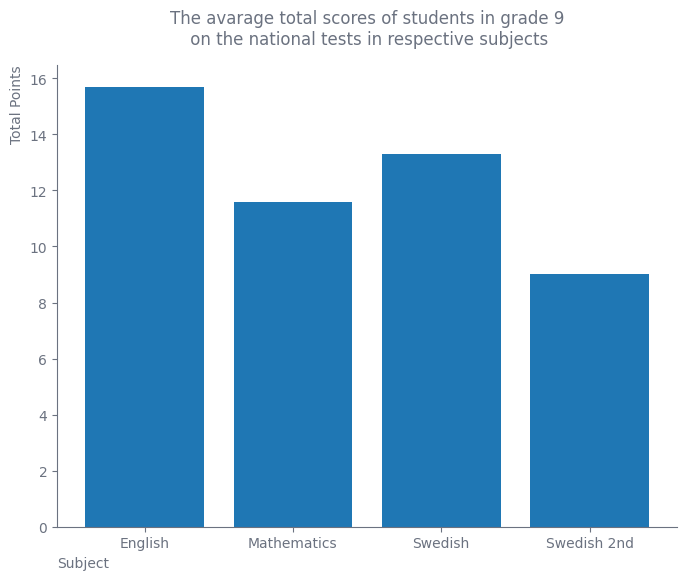

In [333]:
GRAY1 = "#6b7280"

categories = ["English", "Mathematics", "Swedish", "Swedish 2nd"]
total_points = [total_points_english, total_points_mathematics, total_points_swedish, total_points_swedish_2]

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(categories, total_points)
ax.set_ylabel('Total Points', loc="top", color=GRAY1)
ax.set_xlabel('Subject', loc="left", color=GRAY1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(GRAY1)
ax.spines["bottom"].set_color(GRAY1)

ax.tick_params(colors=GRAY1)

ax.set_title("The avarage total scores of students in grade 9\n on the national tests in respective subjects", pad=15, color=GRAY1, fontsize=12)
